<a href="https://colab.research.google.com/github/IshwariK117/ML-Assignments/blob/main/ASSIGNMENT_3_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
downloaded = drive.CreateFile({'id':'1jql2mwV15BCFeX52G1PGSCr8Y4jLdn8f'}) # replace the id with id of file you want to access
downloaded.GetContentFile('DT-Data.csv')


    id  age  income  gender  marital_status
0    0    1       0       1               1
1    1    1       0       1               0
2    2    0       0       1               1
3    3    2       2       1               1
4    4    2       1       0               1
5    5    2       1       0               0
6    6    0       1       0               0
7    7    1       2       1               1
8    8    1       1       0               0
9    9    2       2       0               1
10  10    1       2       0               0
11  11    0       2       1               0
12  12    0       0       0               1
13  13    2       2       1               0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Prediction: ['Yes']


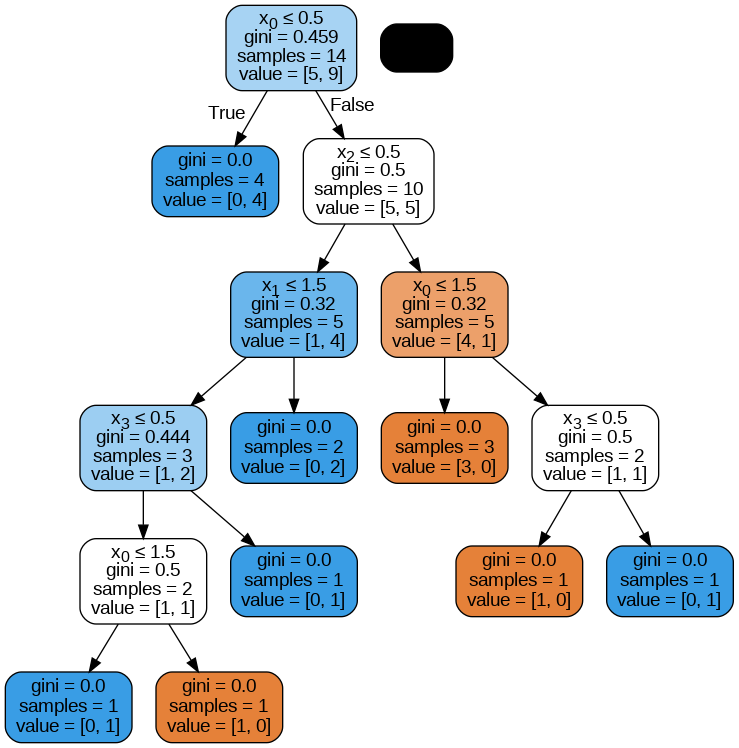

In [ ]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#reading Dataset
dataset=pd.read_csv("DT-Data.csv")
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,5].values

#Perform Label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

X = X.apply(LabelEncoder().fit_transform)
print (X)

from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier()
regressor.fit(X.iloc[:,1:5],y)

#Predict value for the given expression
X_in=np.array([0,1,0,1])

y_pred=regressor.predict([X_in])
print ("Prediction:", y_pred)

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
# Create DOT data
dot_data = StringIO()

export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True, special_characters=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Decision_Tree.png')
# Show graph
Image(graph.create_png())